In [19]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Clustering analysis

Use various clustering techniques to identify a good subset of questions.

---

In [20]:
import os
import sys

import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from visualization.visualize import biplot, plot_explained_variance, triplot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
df = pd.read_csv("../data/processed/1976.csv", index_col=0)

---

## Correlations in data

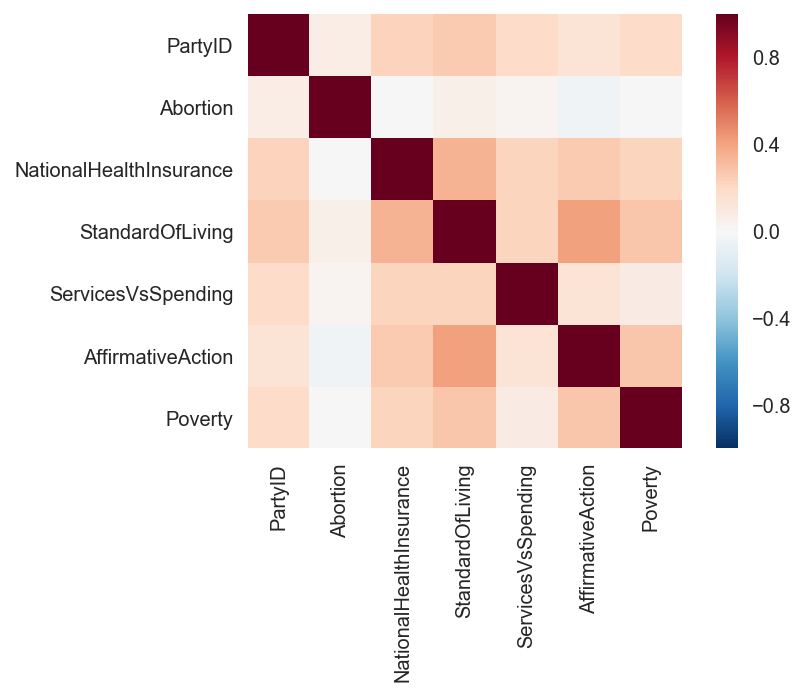

In [22]:
# Spearman is recommended for ordinal data.
correlations = df.corr(method='spearman')
sns.heatmap(correlations,
           square=True);

Note that if we were to scale the data, the correlation matrix would be unchanged.

/Users/Arya/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



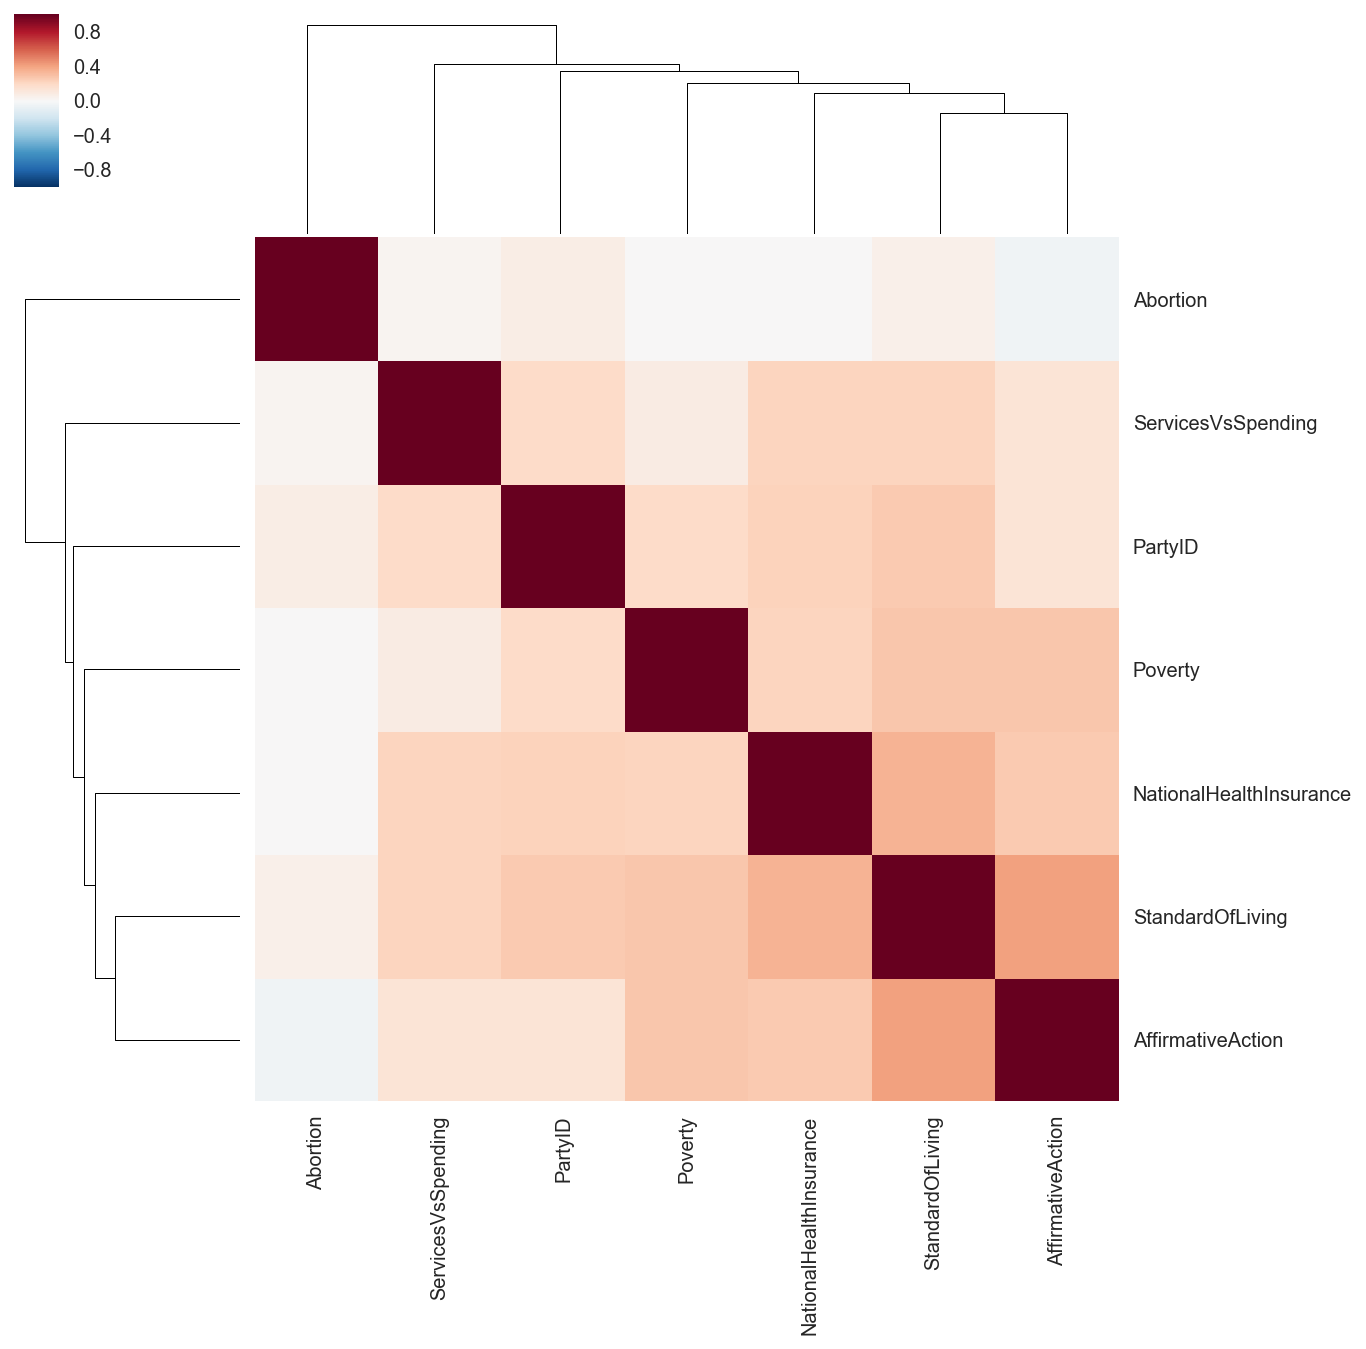

In [23]:
cg = sns.clustermap(correlations, square=True)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),
        rotation=0);  # Fix rotation of y-labels.

The strongest clusters were:

- 665: who did you vote for?
- 796: allow abortion?
- 911: favor strict gun control?
- 757: is poverty structural?

and 

- 273: public vs private insurance
- 241: should gov't guarantee standard of living
- 264: should we aid minorities

## Principal component analysis

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer, StandardScaler

imp = Imputer(strategy='mean')
scl = StandardScaler()
pca = PCA()
pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
        ('pca', pca),
    ])
scaler_pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
    ])
data_pca = pipeline.fit_transform(df)
_scaled = scaler_pipeline.transform(df)

### Explained variance

How much of the variance in the data is explained by each successive component?

In [25]:
plot_explained_variance(pca)

### Biplot

A scatterplot projected onto the first two principal components.

In [26]:
data_scaled = pd.DataFrame(_scaled, columns=df.columns)
triplot(pca, data_scaled, title='ANES 1976 Biplot', color=data_scaled.PartyID)

In [27]:
biplot(pca, data_scaled, title='ANES 1976 Biplot', color=data_scaled.PartyID)

In [28]:
pca.explained_variance_

array([ 2.05477112,  1.03410188,  0.95028802,  0.84781814,  0.75668375,
        0.7456509 ,  0.61068619])

Awkward. Everything seems to be hyper-correlated with one another. This supports that idea of an effective d